In [1]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

velocity_window = 5 # 50ms
wavelet_window = 50  # 500ms

videodirectory = 'B:\HsinYi\DeepLabCut_Anthony\8videos_1400frames_relabled/videos/2023dlc_model/aligned/'
videoname = '*'
filenames=glob.glob(videodirectory+ 'wavelet/'+videoname+ '_croprotaligned01234_nonormalized_wavelet.npz')
filenames
filenames=[ x for x in filenames if "crouched" not in x ]
filenames=[ x for x in filenames if "Crouched" not in x ]
filenames=[ x for x in filenames if "piezo" not in x ]
filenames=[ x for x in filenames if "Piezo" not in x ]
#del filenames[16]

#filenames
len(filenames)

10

In [3]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

velocity_window = 5 # 50ms
wavelet_window = 50  # 500ms

videodirectory = 'B:\HsinYi\DeepLabCut_Anthony\8videos_1400frames_relabled/videos/newvideo_allprey/aligned/'
videoname = '*'
filenames2=glob.glob(videodirectory+ 'cut_wavelet/'+videoname+ '_croprotaligned01234_nonormalized_wavelet.npz')
filenames2
len(filenames2)

20

In [4]:
for i in range(len(filenames2)):
    
    filenames.append(filenames2[i])
len(filenames)

30

In [5]:
csv_filenames = glob.glob('B:/HsinYi/DeepLabCut_Anthony/8videos_1400frames_relabled/videos/2023dlc_model/aligned/merging_static/' + '*' + '_wavelet_timestep.csv')
csv_filenames =[ x for x in csv_filenames  if "piezo" not in x ]
csv_filenames =[ x for x in csv_filenames  if "Piezo" not in x ]
#csv_filenames
csv_filenames

['B:/HsinYi/DeepLabCut_Anthony/8videos_1400frames_relabled/videos/2023dlc_model/aligned/merging_static\\011822 Spider Prey2-01182022163621-0000-1_trimmed_wavelet_timestep.csv',
 'B:/HsinYi/DeepLabCut_Anthony/8videos_1400frames_relabled/videos/2023dlc_model/aligned/merging_static\\032122 Spider Prey-03212022154120-0000-1_wavelet_timestep.csv',
 'B:/HsinYi/DeepLabCut_Anthony/8videos_1400frames_relabled/videos/2023dlc_model/aligned/merging_static\\032822 Spider Prey-03292022141808-0000-1_trimmed_wavelet_timestep.csv',
 'B:/HsinYi/DeepLabCut_Anthony/8videos_1400frames_relabled/videos/2023dlc_model/aligned/merging_static\\042122 Spider Prey-04212022155848-0000_trimmed_wavelet_timestep.csv',
 'B:/HsinYi/DeepLabCut_Anthony/8videos_1400frames_relabled/videos/2023dlc_model/aligned/merging_static\\081924 Spider Prey Pt1-08192024165524-0000_wavelet_timestep.csv',
 'B:/HsinYi/DeepLabCut_Anthony/8videos_1400frames_relabled/videos/2023dlc_model/aligned/merging_static\\082024 Spider Prey Pt1-08202024

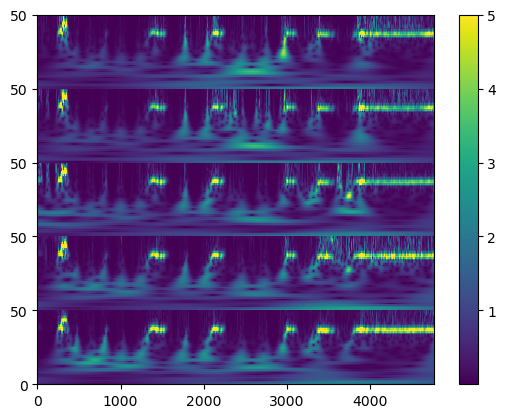

In [6]:
wavelet = np.load(filenames[1])
wavelet_x = wavelet['arr_0']
clip_time = wavelet_x.shape[0]
test_wavelet = wavelet_x.reshape(int(clip_time), 5, 50)
test_wavelet = test_wavelet[:,:,:]
test_wavelet = test_wavelet.reshape(int(clip_time), 50*5)
# wavelet_y = wavelet['arr_1']
# clip_time = wavelet_y.shape[0]
# test_wavelet2 = wavelet_y.reshape(int(clip_time), 5, 50)
# test_wavelet2 = test_wavelet2[:,:,25:50]
# test_wavelet2 = test_wavelet2.reshape(int(clip_time), 25*5)
# test_wavelet = np.append(test_wavelet, test_wavelet2, axis=1)
import matplotlib.pyplot as plt
fig = plt.figure()
plt.pcolormesh(test_wavelet.T, vmax=5)
plt.yticks([0,50, 100, 150, 200, 250], [0, 50, 50, 50, 50, 50])
plt.colorbar()
# plt.show()
plt.savefig('Z:/HsinYi/results/results_svg/0321_spider_prey_xwavelet.svg')


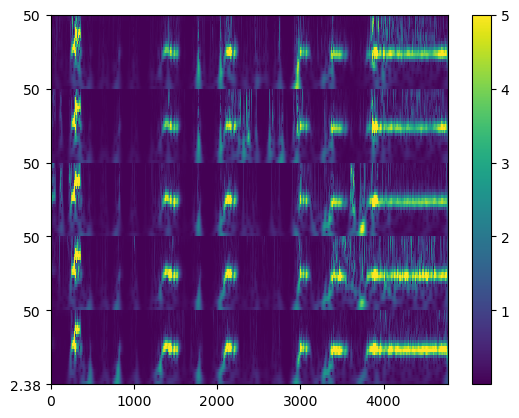

In [7]:
wavelet = np.load(filenames[1])
wavelet_x = wavelet['arr_0']
clip_time = wavelet_x.shape[0]
test_wavelet = wavelet_x.reshape(int(clip_time), 5, 50)
test_wavelet = test_wavelet[:,:,25:50]   ### only use half of wavelet 2.38-50 to ignore noise
test_wavelet = test_wavelet.reshape(int(clip_time), 25*5)
# wavelet_y = wavelet['arr_1']
# clip_time = wavelet_y.shape[0]
# test_wavelet2 = wavelet_y.reshape(int(clip_time), 5, 50)
# test_wavelet2 = test_wavelet2[:,:,25:50]
# test_wavelet2 = test_wavelet2.reshape(int(clip_time), 25*5)
# test_wavelet = np.append(test_wavelet, test_wavelet2, axis=1)
import matplotlib.pyplot as plt
fig = plt.figure()
plt.pcolormesh(test_wavelet.T, vmax=5)
plt.yticks([0,25, 50,75, 100, 125], [2.38, 50, 50, 50, 50, 50])
plt.colorbar()
# plt.show()
plt.savefig('Z:/HsinYi/results/results_svg/0321_spider_prey_xwavelet_half.svg')


In [8]:
from umap.umap_ import nearest_neighbors
import umap

for i in range(len(filenames)):
    wavelet = np.load(filenames[i])
    wavelet_x = wavelet['arr_0']
    clip_time = wavelet_x.shape[0]
    print(clip_time)
    test_wavelet = wavelet_x.reshape(int(clip_time), 5, 50)

    test_wavelet = test_wavelet[:,:,25:50]
    test_wavelet = test_wavelet.reshape(int(clip_time), 25*5)
    if i <10:
         
        beh = np.load(
        # filenames[i].split('/wavelet\\')[0] + '/wavelet/' + filenames[i].split('/wavelet\\')[1].split('01234')[
        #     0] + '01234_nonormalized_wavelet_manuallabels.npy'
        # )
            filenames[i].split('/wavelet\\')[0] + '/wavelet/' + filenames[i].split('/wavelet\\')[1].split('01234')[
                0] + '01234_manual_labels.npy')
        test_wavelet = test_wavelet[0:len(beh),:]

    if i==0:
        data_sample = test_wavelet
    else:
        data_sample = np.append(data_sample, test_wavelet, axis=0)
data_sample.shape
n_data = data_sample.shape[0]

C:\Users\Gordus_Lab\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


5931
4769
2686
150
2504
8085
1448
1550
4875
1515
4874
1479
1536
1928
952
2315
378
1700
2184
6836
2866
3660
1146
487
2812
5516
6347
831
834
8246


In [9]:
data_sample2 = data_sample.reshape(data_sample.shape[0]*data_sample.shape[1])
data_sample2.shape

(10797750,)

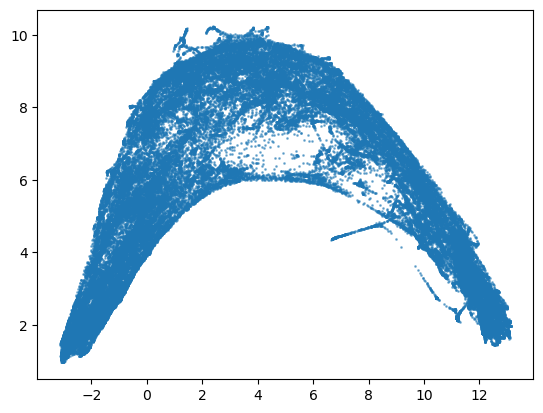

In [10]:
from umap.umap_ import nearest_neighbors
import umap
umap_model = umap.UMAP(n_neighbors=100,
                                            min_dist=0,n_components=5).fit(data_sample)
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(umap_model.embedding_[:, 0],
                   umap_model.embedding_[ :, 1],
                   s=1, alpha=0.5
           )

plt.show()        

In [11]:
from umap.umap_ import nearest_neighbors
import umap
sequences=[]
labeled_beh = []
observations=[]
for i in range(len(filenames)):
#for i in range(1):
    wavelet = np.load(filenames[i])
    wavelet_x = wavelet['arr_0']
    clip_time = wavelet_x.shape[0]
    if i<10:
        csv_file= csv_filenames[i]
        test = pd.read_csv(csv_file)
        j = 0
        spider_timeidx = np.zeros((clip_time))
            
        for (columnName, columnData) in test.iteritems():
            if j % 2 == 0:
                ts = columnData[0]
                ts = ts.astype(int)
            else:
                te = columnData[0]
                te = te.astype(int)
                if 'pulling' in columnName:
                    spider_timeidx[ts:te + 1] = 1
                elif 'walking' in columnName:
                    spider_timeidx[ts:te + 1] = 2
                elif 'turning' in columnName:
                    spider_timeidx[ts:te + 1] = 2
                elif 'shaking' in columnName:
                    spider_timeidx[ts:te + 1] = 2
                elif 'wrapping' in columnName:
                    spider_timeidx[ts:te + 1] = 4
            j=j+1
    
        #spider_timeidx=spider_timeidx[100:int(clip_time-100)]
    
        
        wrap_idx = np.where(spider_timeidx[:]==4)
        spider_timeidx = np.delete(spider_timeidx, wrap_idx[0])
        spider_timeidx_str=[]
        for k in range(len(spider_timeidx)):
            if spider_timeidx[k]==0:
                spider_timeidx_str.append('0')
            elif spider_timeidx[k]==1:
                spider_timeidx_str.append('1')
            elif spider_timeidx[k]==2:
                spider_timeidx_str.append('2')
            elif spider_timeidx[k]==3:
                spider_timeidx_str.append('3')
            elif spider_timeidx[k]==4:
                spider_timeidx_str.append('4')
    
        test_wavelet = wavelet_x.reshape(int(clip_time), 5, 50)
        ## half wavelet x
        #f = wavelet['arr_2']
        test_wavelet = test_wavelet[:,:,25:50]
    
        
       ## try cutting first and end 1s
        #test_wavelet = test_wavelet[100:int(clip_time-100),:,25:50]
        
        test_wavelet = test_wavelet.reshape(int(clip_time), 25*5)
        test_wavelet = np.delete(test_wavelet, wrap_idx[0], axis=0)
    else:
        
        test_wavelet = wavelet_x.reshape(int(clip_time), 5, 50)
        test_wavelet = test_wavelet[:,:,25:50]
        test_wavelet = test_wavelet.reshape(int(clip_time), 25*5)

    ### Here just adding "empty" labels for data structure. So there is no real label in the dataset.
    spider_timeidx_str = ['' for _ in range(int(test_wavelet.shape[0]))]
    normal_embeddings = umap_model.transform(test_wavelet)

    umap1 = normal_embeddings[:,0]
    umap2 = normal_embeddings[:,1]
    umap3 = normal_embeddings[:,2]
    umap4 = normal_embeddings[:,3]
    umap5 = normal_embeddings[:,4]

            
    observations_temp = list(zip(umap1, umap2, umap3, umap4, umap5))
    labeled_data_temp = [(obs, state) for obs, state in zip(observations_temp, spider_timeidx_str)]
    sequences_temp, label_temp = zip(*labeled_data_temp)
    

    sequences.append(sequences_temp)
    labeled_beh.append(label_temp)
    observations.append(list(zip(umap1, umap2, umap3, umap4, umap5)))
 

B:\TMP\ipykernel_9108\394975289.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in test.iteritems():
B:\TMP\ipykernel_9108\394975289.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in test.iteritems():
B:\TMP\ipykernel_9108\394975289.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in test.iteritems():
B:\TMP\ipykernel_9108\394975289.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in test.iteritems():
B:\TMP\ipykernel_9108\394975289.py:20: RuntimeWarning: invalid value encountered in cast
  ts = ts.astype(int)
B:\TMP\ipykernel_9108\394975289.py:23: RuntimeWarning: invalid value encountered in cast
  te = te.astype(int)
B:\TMP\ipykern

In [12]:
observation_extend=[]

for i in range(len(observations)):
    observation_extend.extend(observations[i])
len(observation_extend)

86382

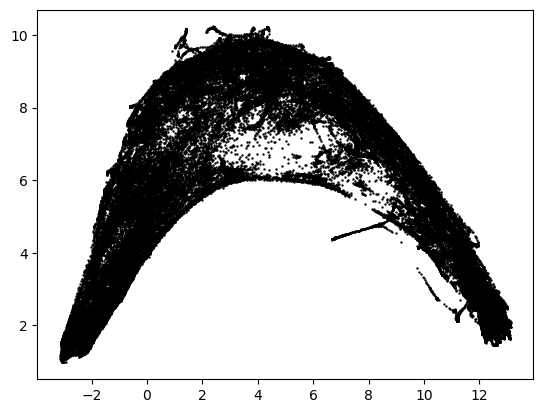

In [13]:
### Try unsupervised
from sklearn.cluster import KMeans
import numpy as np

label_predict  = KMeans(n_clusters=3, random_state=0, n_init="auto").fit_predict(np.reshape(observation_extend, (n_data,5)))

fig, ax = plt.subplots()

sc=plt.scatter(np.reshape(observation_extend, (n_data, 5))[:, 0],
                  np.reshape(observation_extend, (n_data,5))[ :, 1],
                    s=0.5, color = 'black')  # 5 points toleranc


plt.savefig('Z:/HsinYi/results/results_svg/umap_all30preyvideos.png', dpi=500)

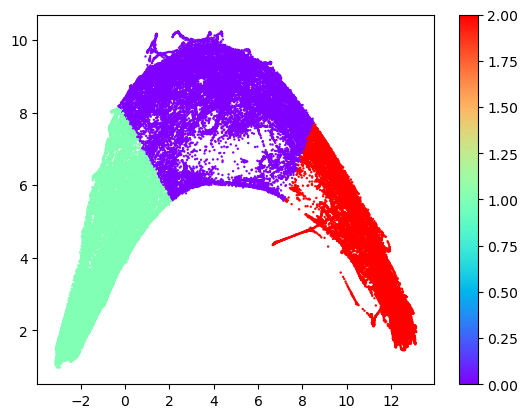

In [15]:
### Try unsupervised
from sklearn.cluster import KMeans
import numpy as np

label_predict  = KMeans(n_clusters=3, random_state=0, n_init="auto").fit_predict(np.reshape(observation_extend, (n_data,5)))

fig, ax = plt.subplots()

sc=plt.scatter(np.reshape(observation_extend, (n_data,5))[:, 0],
                  np.reshape(observation_extend, (n_data,5))[ :, 1],
                    s=0.5, c=label_predict,  cmap='rainbow')  # 5 points toleranc
plt.colorbar()
plt.show()


In [16]:
### Just change the label name to make it consistent with manual labels. 
idx_1 = np.where(label_predict==1)[0]
idx_2 = np.where(label_predict==2)[0]
idx_0 = np.where(label_predict==0)[0]
idx_1

array([ 4004,  4005,  4006, ..., 86379, 86380, 86381], dtype=int64)

In [17]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

viridis = cm.get_cmap('grey',20)

newcolors = viridis(np.linspace(0, 1, 5))
newcolors =newcolors[0:4, :]
newcmp = ListedColormap(newcolors)
print(newcolors)

[[0.         0.         0.         1.        ]
 [0.26315789 0.26315789 0.26315789 1.        ]
 [0.52631579 0.52631579 0.52631579 1.        ]
 [0.78947368 0.78947368 0.78947368 1.        ]]


B:\TMP\ipykernel_9108\155461147.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('grey',20)


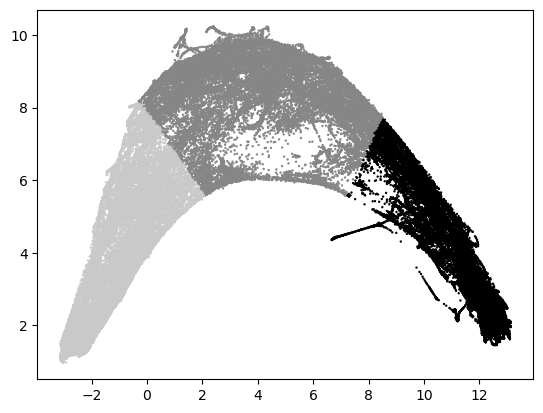

In [18]:
label_predict[idx_0]=1
label_predict[idx_1]=2
label_predict[idx_2]=0
### Try unsupervised
from sklearn.cluster import KMeans
import numpy as np

fig, ax = plt.subplots()

sc=plt.scatter(np.reshape(observation_extend, (n_data,5))[:, 0],
                  np.reshape(observation_extend, (n_data,5))[ :, 1],
                    s=0.5, c=label_predict,  cmap=newcmp)  # 5 points toleranc

plt.savefig('Z:/HsinYi/results/umap_all30preyvideos_kmean.png', dpi=500)


In [19]:
label_predict_extend=[]

for i in range(len(label_predict)):
    label_predict_extend.extend(np.array2string(label_predict[i]))


In [20]:
len(observation_extend)

86382

In [21]:
##Unsupervised

from pomegranate import *
#observations = list(zip(high_wavelet, low_wavelet))
#labeled_data = [(obs, state) for obs, state in zip(observations, spider_timeidx_str)]
#sequences, _ = zip(*labeled_data)

# Define the hidden states
states = ["0","1", "2"]

# Create a dictionary to map behavioral states to state indices
state_to_index = {state: i for i, state in enumerate(states)}

# Create a list of state indices for the labeled data
state_indices = [state_to_index[label] for label in label_predict_extend]

# Create the HMM model
model_train = HiddenMarkovModel()

# Create the hidden states (in this example, 2 states: Roaming and Dwelling)
#hidden_states = [State(NormalDistribution.from_samples(observations[state_indices == i]), name=state) for i, state in enumerate(states)]
hidden_states = [State(MultivariateGaussianDistribution.from_samples(np.array(observation_extend)[np.where(np.array(state_indices)==i)[0]]), name=state) for i, state in enumerate(states)]


# Add the states to the model
model_train.add_states(hidden_states)

# Add transitions based on your labeled data (you need the transition probabilities)
# For simplicity, let's assume equal transition probabilities for this example
#for state in hidden_states:
#    model.add_transition(model.start, state, 1.0)
#    model.add_transition(state, model.end, 1.0)


# Define initial state probabilities (customize as needed)
initial_probabilities = [np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()]
model_train.add_transition(model_train.start, hidden_states[0], initial_probabilities[0])
model_train.add_transition(model_train.start, hidden_states[1], initial_probabilities[1])
model_train.add_transition(model_train.start, hidden_states[2], initial_probabilities[2])


# Define state transition probabilities as real numbers (customize as needed)
transition_matrix = [
    [np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()],
    [np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()],
    [np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand(), np.random.rand()]
]

for i in range(len(states)):
    for j in range(len(states)):
        model_train.add_transition(hidden_states[i], hidden_states[j], transition_matrix[i][j])


# Finalize the model
model_train.bake()

# Now you have a trained HMM model
# Train the model using labeled data and Baum-Welch (EM algorithm)
#labeled_data = [(obs, state) for obs, state in zip(observations, spider_timeidx_str)]
#sequences, _ = zip(*labeled_data)  # Change labels to _
model_train.fit(sequences=sequences, algorithm="baum-welch", verbose=True, min_iterations=50,
                            max_iterations=500, stop_threshold=1e-5,
                            return_history=True)  # Use Baum-Welch algorithm


[1] Improvement: 83433.08026482532	Time (s): 0.4756
[2] Improvement: 2378.725162837014	Time (s): 0.4786
[3] Improvement: 1034.1040298687294	Time (s): 0.4775
[4] Improvement: 571.8264214969822	Time (s): 0.4789
[5] Improvement: 348.52824702172074	Time (s): 0.4782
[6] Improvement: 197.623215369822	Time (s): 0.479
[7] Improvement: 96.23028822237393	Time (s): 0.4778
[8] Improvement: 57.67733561369823	Time (s): 0.4776
[9] Improvement: 41.28320925013395	Time (s): 0.4791
[10] Improvement: 32.33636613562703	Time (s): 0.4841
[11] Improvement: 23.73420935519971	Time (s): 0.4798
[12] Improvement: 15.226633808051702	Time (s): 0.4814
[13] Improvement: 12.27669259434333	Time (s): 0.48
[14] Improvement: 8.198000369186047	Time (s): 0.4803
[15] Improvement: 4.577889322885312	Time (s): 0.48
[16] Improvement: 2.623125968617387	Time (s): 0.481
[17] Improvement: 1.5426680409000255	Time (s): 0.4834
[18] Improvement: 0.8838690380216576	Time (s): 0.4689
[19] Improvement: 0.4836052788887173	Time (s): 0.4681
[20

({
     "class" : "HiddenMarkovModel",
     "name" : "None",
     "start" : {
         "class" : "State",
         "distribution" : null,
         "name" : "None-start",
         "weight" : 1.0
     },
     "end" : {
         "class" : "State",
         "distribution" : null,
         "name" : "None-end",
         "weight" : 1.0
     },
     "states" : [
         {
             "class" : "State",
             "distribution" : {
                 "class" : "Distribution",
                 "name" : "MultivariateGaussianDistribution",
                 "parameters" : [
                     [
                         10.693159222502763,
                         4.354573161803981,
                         4.981587009585579,
                         2.0910656303103545,
                         9.496863020143806
                     ],
                     [
                         [
                             2.320204838223852,
                             -2.475164579823606,
              

In [22]:

column_names = [s.name for s in model_train.states]
print(column_names)
print("\nStates:")
print(model_train.states)
print("\nTransition matrix:")
print(model_train.dense_transition_matrix())


['0', '1', '2', 'None-start', 'None-end']

States:
[{
    "class" : "State",
    "distribution" : {
        "class" : "Distribution",
        "name" : "MultivariateGaussianDistribution",
        "parameters" : [
            [
                10.693159222502763,
                4.354573161803981,
                4.981587009585579,
                2.0910656303103545,
                9.496863020143806
            ],
            [
                [
                    2.320204838223852,
                    -2.475164579823606,
                    -0.7925027462662799,
                    0.1176452447249474,
                    -0.04723399639205866
                ],
                [
                    -2.475164579823606,
                    3.0933737994265202,
                    0.8511933540940734,
                    -0.09940373134683347,
                    0.207187031891836
                ],
                [
                    -0.7925027462662799,
                    0.8511933540940

In [23]:
Z = model_train.predict(observation_extend)

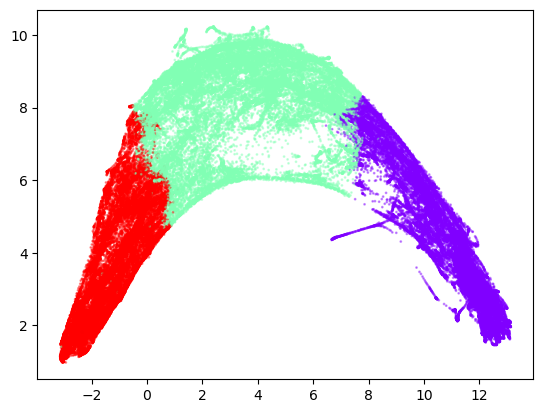

In [24]:
## import matplotlib.pyplot as plt
plt.figure()
plt.scatter(np.reshape(observation_extend,(n_data, 5))[:,0],
                  np.reshape(observation_extend,(n_data,5))[:,1],
            c=Z,
             cmap='rainbow',
                   s=1, alpha=0.4
           )

plt.show() 

In [27]:
len(np.reshape(observation_extend,(n_data,5))[:,0][np.where(np.array(Z)==0)[0]]
   )

28553

B:\TMP\ipykernel_9108\2740880958.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.reshape(observation_extend,(n_data,5))[:,0][np.where(np.array(Z)==0)[0]],
B:\TMP\ipykernel_9108\2740880958.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(np.reshape(observation_extend,(n_data, 5))[:,0][np.where(np.array(Z)==2)[0]],


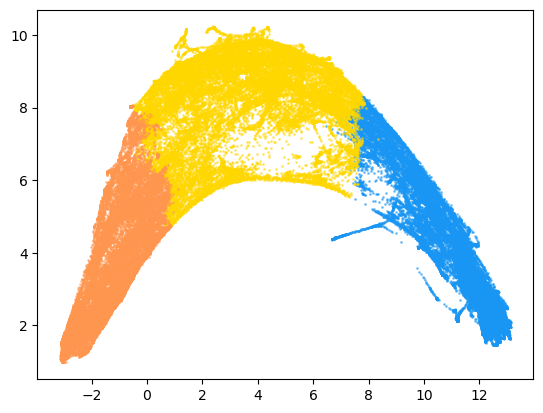

In [28]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import get_cmap
rainbow = get_cmap('rainbow', 256)
newcolors = rainbow(np.linspace(0, 1, 6))
plt.figure()
plt.scatter(np.reshape(observation_extend,(n_data,5))[:,0][np.where(np.array(Z)==0)[0]],
                 np.reshape(observation_extend,(n_data,5))[:,1][np.where(np.array(Z)==0)[0]],
            c=newcolors[1],
                   s=1, alpha=0.5
           )
plt.scatter(np.reshape(observation_extend,(n_data,5))[:,0][np.where(np.array(Z)==1)[0]],
                 np.reshape(observation_extend,(n_data,5))[:,1][np.where(np.array(Z)==1)[0]],
            c='gold',
                   s=1, alpha=0.5
           )
plt.scatter(np.reshape(observation_extend,(n_data, 5))[:,0][np.where(np.array(Z)==2)[0]],
                 np.reshape(observation_extend,(n_data,5))[:,1][np.where(np.array(Z)==2)[0]],
            c=newcolors[4],
                   s=1, alpha=0.5
           )

plt.savefig('Z:/HsinYi/results/results_svg/umap_all30preyvideos_hmmpredict.png', dpi=500)

In [29]:
observation_extend_partial = np.reshape(observation_extend,(n_data,5))
observation_extend_partial.shape

(86382, 5)

In [30]:
len(labeled_beh)

30

In [31]:
from umap.umap_ import nearest_neighbors
import umap

labeled_beh = []

for i in range(10):
#for i in range(1):
    wavelet = np.load(filenames[i])
    wavelet_x = wavelet['arr_0']
    clip_time = wavelet_x.shape[0]
    if i<11:
        csv_file= csv_filenames[i]
        test = pd.read_csv(csv_file)
        j = 0
        spider_timeidx = np.zeros((clip_time))
            
        for (columnName, columnData) in test.iteritems():
            if j % 2 == 0:
                ts = columnData[0]
                ts = ts.astype(int)
            else:
                te = columnData[0]
                te = te.astype(int)
                if 'pulling' in columnName:
                    spider_timeidx[ts:te + 1] = 1
                elif 'walking' in columnName:
                    spider_timeidx[ts:te + 1] = 2
                elif 'turning' in columnName:
                    spider_timeidx[ts:te + 1] = 2
                elif 'shaking' in columnName:
                    spider_timeidx[ts:te + 1] = 2
                elif 'wrapping' in columnName:
                    spider_timeidx[ts:te + 1] = 4
            j=j+1
    
        #spider_timeidx=spider_timeidx[100:int(clip_time-100)]
    
        
        wrap_idx = np.where(spider_timeidx[:]==4)
        spider_timeidx = np.delete(spider_timeidx, wrap_idx[0])
        spider_timeidx_str=[]
        for k in range(len(spider_timeidx)):
            if spider_timeidx[k]==0:
                spider_timeidx_str.append('0')
            elif spider_timeidx[k]==1:
                spider_timeidx_str.append('1')
            elif spider_timeidx[k]==2:
                spider_timeidx_str.append('2')
            elif spider_timeidx[k]==3:
                spider_timeidx_str.append('3')
            elif spider_timeidx[k]==4:
                spider_timeidx_str.append('4')
    
   
    labeled_beh.append(spider_timeidx_str)
    np.save(filenames[i].replace('_nonormalized_wavelet.npz', '_manual_labels.npy'), np.array(spider_timeidx_str, dtype=np.float32))
 
    
    #if i==0:
        #zip(*zip(*zipped), L3)
    #    observations = list(list(zip(high_wavelet, low_wavelet))
    #else:
    #    observations.append(list(zip(high_wavelet, low_wavelet)))
        #observations = zip(*zip(*observations), high_wavelet, low_wavelet)
        #zip(observations,high_wavelet, low_wavelet)

#len(labeled_beh)

B:\TMP\ipykernel_9108\2562437462.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in test.iteritems():
B:\TMP\ipykernel_9108\2562437462.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in test.iteritems():
B:\TMP\ipykernel_9108\2562437462.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in test.iteritems():
B:\TMP\ipykernel_9108\2562437462.py:17: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (columnName, columnData) in test.iteritems():
B:\TMP\ipykernel_9108\2562437462.py:20: RuntimeWarning: invalid value encountered in cast
  ts = ts.astype(int)
B:\TMP\ipykernel_9108\2562437462.py:23: RuntimeWarning: invalid value encountered in cast
  te = te.astype(int)
B:\TMP\i

In [32]:
len(labeled_beh)

10

In [33]:

labeled_beh_extend =[]
for i in range(len(labeled_beh)):

    labeled_beh_extend.extend(labeled_beh[i])
labeled_beh_extend_num= np.array(labeled_beh_extend).astype(int)
len(labeled_beh_extend_num)

29455

In [34]:
observation_extend_partial = observation_extend_partial[0:len(labeled_beh_extend_num),:]

B:\TMP\ipykernel_9108\535489923.py:6: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(observation_extend_partial[np.where(labeled_beh_extend_num==0)[0],0],
B:\TMP\ipykernel_9108\535489923.py:16: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(observation_extend_partial[np.where(labeled_beh_extend_num==2)[0],0],


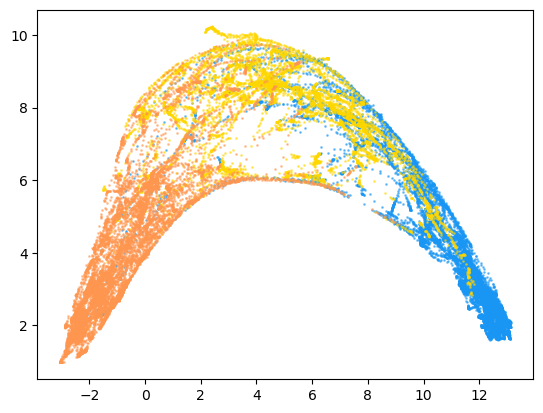

In [35]:
## compare with manaul label
import matplotlib.pyplot as plt


plt.figure()
plt.scatter(observation_extend_partial[np.where(labeled_beh_extend_num==0)[0],0],
                  observation_extend_partial[np.where(labeled_beh_extend_num==0)[0],1],
            c=newcolors[1],
                   s=1, alpha=0.5, label = 'Static'
           )
plt.scatter(observation_extend_partial[np.where(labeled_beh_extend_num==1)[0],0],
                  observation_extend_partial[np.where(labeled_beh_extend_num==1)[0],1],
            c='gold',
                   s=1, alpha=0.5, label = 'Crouching'
           )
plt.scatter(observation_extend_partial[np.where(labeled_beh_extend_num==2)[0],0],
                  observation_extend_partial[np.where(labeled_beh_extend_num==2)[0],1],
            c=newcolors[4],
                   s=1, alpha=0.5, label = 'High Frequency'
           )
# plt.legend(loc="best",markerscale=6, fontsize=10)

plt.savefig('Z:/HsinYi/results/umap_all30preyvideos_manuallabel.png', dpi=500) 

In [36]:
Z_sub = Z[0:len(labeled_beh_extend_num)]
len(Z_sub)

29455

In [37]:
print('HMM accuracy without smoothing:')
np.sum(labeled_beh_extend_num==Z_sub)/len(Z_sub)

HMM accuracy without smoothing:


0.8225768120862332

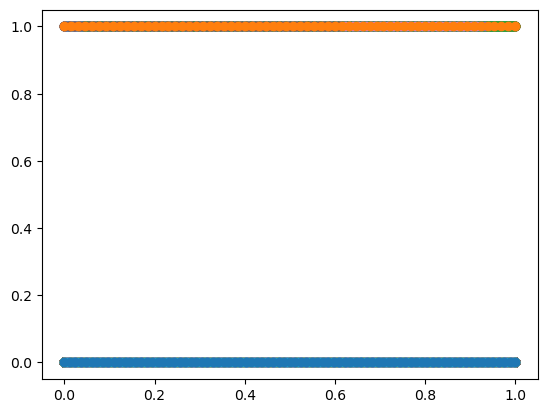

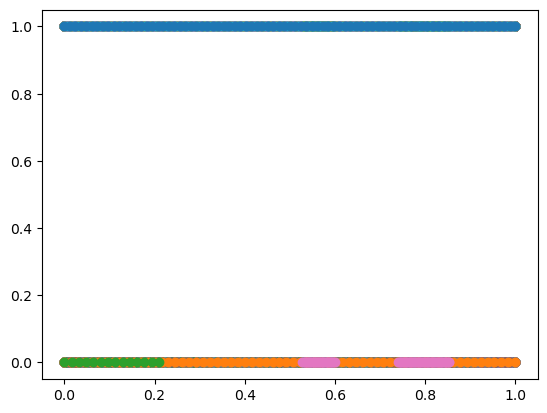

In [38]:
from itertools import groupby

idx0_real = (labeled_beh_extend_num == 0)
idx0_predict = (np.array(Z_sub).astype(int) == 0)

tp = np.logical_and(idx0_predict == True, idx0_real == True)
fp = np.logical_and(idx0_predict == True, idx0_real == False)
fn = np.logical_and(idx0_predict == False, idx0_real == True)
tn = np.logical_and(idx0_predict == False, idx0_real == False)

count_dups = [sum(1 for _ in group) for _, group in groupby(np.array(labeled_beh_extend_num))]
cumsum = np.cumsum(count_dups)
x_values = []
y_values = []
plt.figure()
for i in range(len(count_dups)):
    x = np.linspace(0, 1, count_dups[i])
    x_values.extend(x)
    if i > 0:
        plt.plot(np.linspace(0, 1, count_dups[i]), tp[cumsum[i - 1]:cumsum[i]], 'o')
        y_values.extend(tp[cumsum[i - 1]:cumsum[i]])
    else:
        plt.plot(np.linspace(0, 1, count_dups[i]), tp[0:cumsum[i]], 'o')
        y_values.extend(tp[0:cumsum[i]])

x_values = np.array(x_values)
y_values = np.array(y_values)
# Define bins
nbin=100
bins = np.linspace(0, 1, nbin)  # 10 bins (you can adjust this)
# Digitize x values to find which bin they belong to
bin_indices = np.digitize(x_values, bins) - 1  # -1 to make it zero-indexed
# Calculate sum of y values in each bin
y_sums = np.zeros(len(bins) - 1)  # One less than the number of bins
for i in range(len(y_values)):
    if bin_indices[i] >= 0 and bin_indices[i] < len(y_sums):
        y_sums[bin_indices[i]] += y_values[i]
# Calculate total and percentages
unique, counts = np.unique(bin_indices, return_counts=True)
tp_0 = (y_sums / counts[0:int(nbin-1)]) * 100
# Plotting the results


count_dups = [sum(1 for _ in group) for _, group in groupby(np.array(labeled_beh_extend_num))]
cumsum = np.cumsum(count_dups)
x_values = []
y_values = []
plt.figure()
for i in range(len(count_dups)):
    x = np.linspace(0, 1, count_dups[i])
    x_values.extend(x)
    if i > 0:
        plt.plot(np.linspace(0, 1, count_dups[i]), tn[cumsum[i - 1]:cumsum[i]], 'o')
        y_values.extend(tn[cumsum[i - 1]:cumsum[i]])
    else:
        plt.plot(np.linspace(0, 1, count_dups[i]), tn[0:cumsum[i]], 'o')
        y_values.extend(tn[0:cumsum[i]])

x_values = np.array(x_values)
y_values = np.array(y_values)
# Define bins
nbin=100
bins = np.linspace(0, 1, nbin)  # 10 bins (you can adjust this)
# Digitize x values to find which bin they belong to
bin_indices = np.digitize(x_values, bins) - 1  # -1 to make it zero-indexed
# Calculate sum of y values in each bin
y_sums = np.zeros(len(bins) - 1)  # One less than the number of bins
for i in range(len(y_values)):
    if bin_indices[i] >= 0 and bin_indices[i] < len(y_sums):
        y_sums[bin_indices[i]] += y_values[i]
# Calculate total and percentages
unique, counts = np.unique(bin_indices, return_counts=True)
tn_0 = (y_sums / counts[0:int(nbin-1)]) * 100

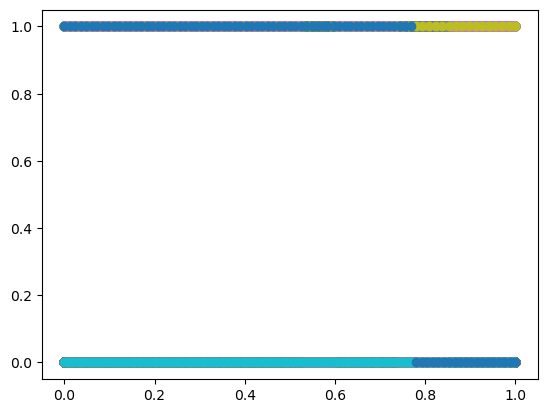

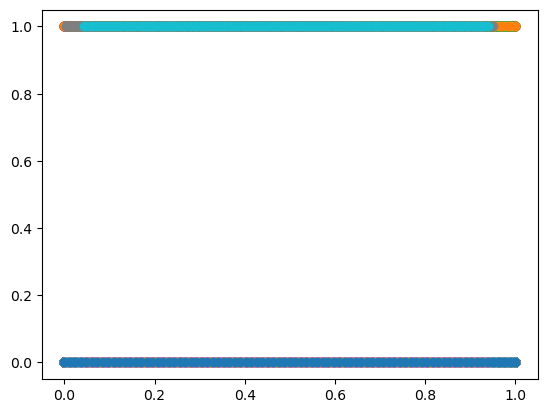

In [39]:
from itertools import groupby

idx0_real = (labeled_beh_extend_num == 1)
idx0_predict = (np.array(Z_sub).astype(int) == 1)

tp = np.logical_and(idx0_predict == True, idx0_real == True)
fp = np.logical_and(idx0_predict == True, idx0_real == False)
fn = np.logical_and(idx0_predict == False, idx0_real == True)
tn = np.logical_and(idx0_predict == False, idx0_real == False)

count_dups = [sum(1 for _ in group) for _, group in groupby(np.array(labeled_beh_extend_num))]
cumsum = np.cumsum(count_dups)
x_values = []
y_values = []
plt.figure()
for i in range(len(count_dups)):
    x = np.linspace(0, 1, count_dups[i])
    x_values.extend(x)
    if i > 0:
        plt.plot(np.linspace(0, 1, count_dups[i]), tp[cumsum[i - 1]:cumsum[i]], 'o')
        y_values.extend(tp[cumsum[i - 1]:cumsum[i]])
    else:
        plt.plot(np.linspace(0, 1, count_dups[i]), tp[0:cumsum[i]], 'o')
        y_values.extend(tp[0:cumsum[i]])

x_values = np.array(x_values)
y_values = np.array(y_values)
# Define bins
nbin=100
bins = np.linspace(0, 1, nbin)  # 10 bins (you can adjust this)
# Digitize x values to find which bin they belong to
bin_indices = np.digitize(x_values, bins) - 1  # -1 to make it zero-indexed
# Calculate sum of y values in each bin
y_sums = np.zeros(len(bins) - 1)  # One less than the number of bins
for i in range(len(y_values)):
    if bin_indices[i] >= 0 and bin_indices[i] < len(y_sums):
        y_sums[bin_indices[i]] += y_values[i]
# Calculate total and percentages
unique, counts = np.unique(bin_indices, return_counts=True)
tp_1 = (y_sums / counts[0:int(nbin-1)]) * 100
# Plotting the results


count_dups = [sum(1 for _ in group) for _, group in groupby(np.array(labeled_beh_extend_num))]
cumsum = np.cumsum(count_dups)
x_values = []
y_values = []
plt.figure()
for i in range(len(count_dups)):
    x = np.linspace(0, 1, count_dups[i])
    x_values.extend(x)
    if i > 0:
        plt.plot(np.linspace(0, 1, count_dups[i]), tn[cumsum[i - 1]:cumsum[i]], 'o')
        y_values.extend(tn[cumsum[i - 1]:cumsum[i]])
    else:
        plt.plot(np.linspace(0, 1, count_dups[i]), tn[0:cumsum[i]], 'o')
        y_values.extend(tn[0:cumsum[i]])

x_values = np.array(x_values)
y_values = np.array(y_values)
# Define bins
nbin=100
bins = np.linspace(0, 1, nbin)  # 10 bins (you can adjust this)
# Digitize x values to find which bin they belong to
bin_indices = np.digitize(x_values, bins) - 1  # -1 to make it zero-indexed
# Calculate sum of y values in each bin
y_sums = np.zeros(len(bins) - 1)  # One less than the number of bins
for i in range(len(y_values)):
    if bin_indices[i] >= 0 and bin_indices[i] < len(y_sums):
        y_sums[bin_indices[i]] += y_values[i]
# Calculate total and percentages
unique, counts = np.unique(bin_indices, return_counts=True)
tn_1 = (y_sums / counts[0:int(nbin-1)]) * 100

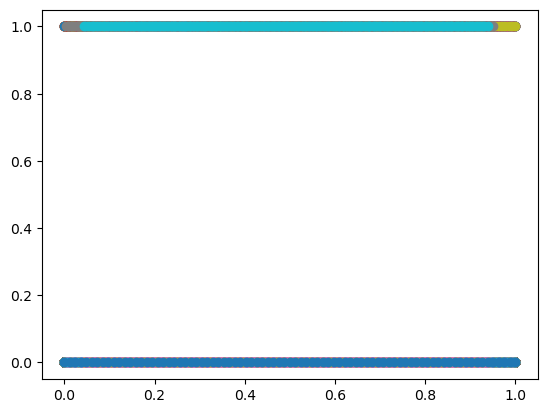

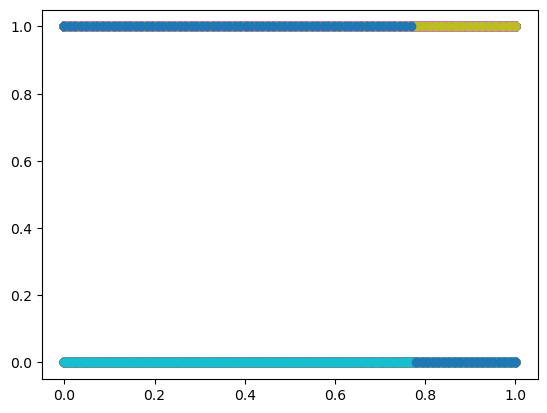

In [40]:
from itertools import groupby

idx0_real = (labeled_beh_extend_num == 2)
idx0_predict = (np.array(Z_sub).astype(int) == 2)

tp = np.logical_and(idx0_predict == True, idx0_real == True)
fp = np.logical_and(idx0_predict == True, idx0_real == False)
fn = np.logical_and(idx0_predict == False, idx0_real == True)
tn = np.logical_and(idx0_predict == False, idx0_real == False)

count_dups = [sum(1 for _ in group) for _, group in groupby(np.array(labeled_beh_extend_num))]
cumsum = np.cumsum(count_dups)
x_values = []
y_values = []
plt.figure()
for i in range(len(count_dups)):
    x = np.linspace(0, 1, count_dups[i])
    x_values.extend(x)
    if i > 0:
        plt.plot(np.linspace(0, 1, count_dups[i]), tp[cumsum[i - 1]:cumsum[i]], 'o')
        y_values.extend(tp[cumsum[i - 1]:cumsum[i]])
    else:
        plt.plot(np.linspace(0, 1, count_dups[i]), tp[0:cumsum[i]], 'o')
        y_values.extend(tp[0:cumsum[i]])

x_values = np.array(x_values)
y_values = np.array(y_values)
# Define bins
nbin=100
bins = np.linspace(0, 1, nbin)  # 10 bins (you can adjust this)
# Digitize x values to find which bin they belong to
bin_indices = np.digitize(x_values, bins) - 1  # -1 to make it zero-indexed
# Calculate sum of y values in each bin
y_sums = np.zeros(len(bins) - 1)  # One less than the number of bins
for i in range(len(y_values)):
    if bin_indices[i] >= 0 and bin_indices[i] < len(y_sums):
        y_sums[bin_indices[i]] += y_values[i]
# Calculate total and percentages
unique, counts = np.unique(bin_indices, return_counts=True)
tp_2 = (y_sums / counts[0:int(nbin-1)]) * 100
# Plotting the results


count_dups = [sum(1 for _ in group) for _, group in groupby(np.array(labeled_beh_extend_num))]
cumsum = np.cumsum(count_dups)
x_values = []
y_values = []
plt.figure()
for i in range(len(count_dups)):
    x = np.linspace(0, 1, count_dups[i])
    x_values.extend(x)
    if i > 0:
        plt.plot(np.linspace(0, 1, count_dups[i]), tn[cumsum[i - 1]:cumsum[i]], 'o')
        y_values.extend(tn[cumsum[i - 1]:cumsum[i]])
    else:
        plt.plot(np.linspace(0, 1, count_dups[i]), tn[0:cumsum[i]], 'o')
        y_values.extend(tn[0:cumsum[i]])

x_values = np.array(x_values)
y_values = np.array(y_values)
# Define bins
nbin=100
bins = np.linspace(0, 1, nbin)  # 10 bins (you can adjust this)
# Digitize x values to find which bin they belong to
bin_indices = np.digitize(x_values, bins) - 1  # -1 to make it zero-indexed
# Calculate sum of y values in each bin
y_sums = np.zeros(len(bins) - 1)  # One less than the number of bins
for i in range(len(y_values)):
    if bin_indices[i] >= 0 and bin_indices[i] < len(y_sums):
        y_sums[bin_indices[i]] += y_values[i]
# Calculate total and percentages
unique, counts = np.unique(bin_indices, return_counts=True)
tn_2 = (y_sums / counts[0:int(nbin-1)]) * 100

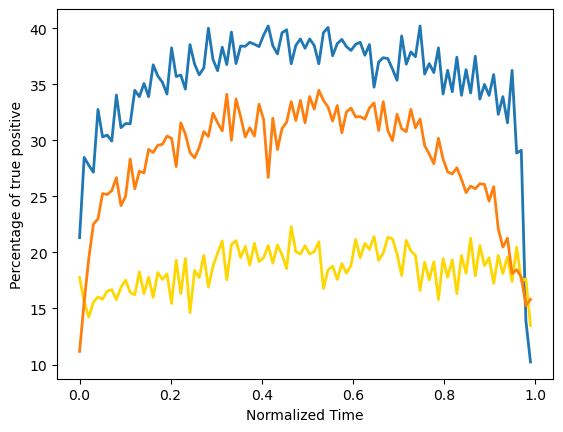

In [41]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import get_cmap
rainbow = get_cmap('rainbow', 256)
newcolors = rainbow(np.linspace(0, 1, 6))

plt.figure()
plt.plot(bins[:-1],tp_0, linewidth=2)
plt.plot(bins[:-1],tp_1, color = 'gold', linewidth=2)
plt.plot(bins[:-1],tp_2,  linewidth=2)
plt.xlabel('Normalized Time')
plt.ylabel('Percentage of true positive')

plt.savefig('Z:/HsinYi/results/results_svg/wavelethmm_manual_tp.svg')


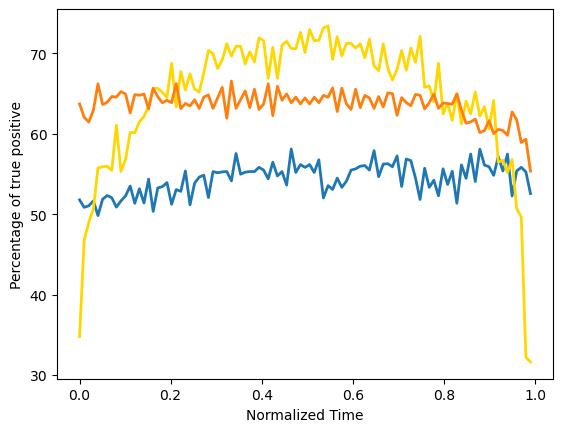

In [42]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import get_cmap
rainbow = get_cmap('rainbow', 256)
newcolors = rainbow(np.linspace(0, 1, 6))

plt.figure()
plt.plot(bins[:-1],tn_0, linewidth=2)
plt.plot(bins[:-1],tn_1, color = 'gold', linewidth=2)
plt.plot(bins[:-1],tn_2,  linewidth=2)
plt.xlabel('Normalized Time')
plt.ylabel('Percentage of true positive')

plt.savefig('Z:/HsinYi/results/results_svg/wavelethmm_manual_tn.svg')


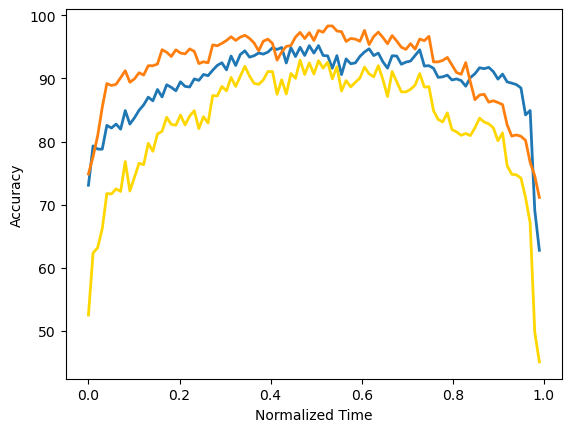

In [43]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import get_cmap
rainbow = get_cmap('rainbow', 256)
newcolors = rainbow(np.linspace(0, 1, 6))

plt.figure()
plt.plot(bins[:-1],tp_0+tn_0, linewidth=2)
plt.plot(bins[:-1],tp_1+tn_1, color = 'gold', linewidth=2)
plt.plot(bins[:-1],tp_2+tn_2,  linewidth=2)
plt.xlabel('Normalized Time')
plt.ylabel('Accuracy')

plt.savefig('Z:/HsinYi/results/results_svg/wavelethmm_manual_accuracy.svg')


In [44]:
a = np.mean(tp_0[2:97]+tn_0[2:97])
b = np.mean(tp_1[2:97]+tn_1[2:97])
c = np.mean(tp_1[2:97]+tn_1[2:97])
(a+b+c)/3

86.46852543238835

In [45]:

    from matplotlib.pyplot import get_cmap
    rainbow = get_cmap('rainbow', 256)
    newcolors = rainbow(np.linspace(0, 1, 3))
    newcolors = np.append(newcolors,np.ones((1,4)))
    newcolors =newcolors.reshape(4,4)

    def plot_state_as_color(x_data, state_data,state_data_predict, axis, newcolors, add_labels=True):
        state_current = state_data[0]
        span_left = x_data[0]
        state_encountered = []
        for span_right, state_next in zip(x_data, state_data):
            if np.isnan(state_current):
                state_current = state_next
                continue
            elif state_current != state_next:
                label = None
                if state_current not in state_encountered:
                    state_encountered.append(state_current)
                    if add_labels:
                        label = state_current

                # plot section
                color = int(state_current)
                axis.axvspan(span_left, span_right, ymin=0.5, ymax = 1, facecolor=newcolors[color], alpha=0.2, label=label)

                # Update current state parameters
                span_left = span_right
                state_current = state_next

        state_current_predict = state_data_predict[0]
        span_left_predict = x_data[0]
        state_encountered_predict = []
        for span_right_predict, state_next_predict in zip(x_data, state_data_predict):
            if np.isnan(state_current_predict):
                state_current_predict = state_next_predict
                continue
            elif state_current_predict != state_next_predict:
                label = None
                if state_current_predict not in state_encountered_predict:
                    state_encountered_predict.append(state_current_predict)
                    if add_labels:
                        label = state_current_predict

                # plot section
                color = int(state_current_predict)
                axis.axvspan(span_left_predict, span_right_predict, ymin=0, ymax = 0.5, facecolor=newcolors[color], alpha=0.2, label=label)

                # Update current state parameters
                span_left_predict = span_right_predict
                state_current_predict = state_next_predict



    def plot_state_predict_as_color(x_data, state_data_predict, axis, newcolors, add_labels=True):
        state_current_predict = state_data_predict[0]
        span_left_predict = x_data[0]
        state_encountered_predict = []
        for span_right_predict, state_next_predict in zip(x_data, state_data_predict):
            if np.isnan(state_current_predict):
                state_current_predict = state_next_predict
                continue
            elif state_current_predict != state_next_predict:
                label = None
                if state_current_predict not in state_encountered_predict:
                    state_encountered_predict.append(state_current_predict)
                    if add_labels:
                        label = state_current_predict

                # plot section
                color = int(state_current_predict)
                axis.axvspan(span_left_predict, span_right_predict, ymin=0, ymax = 1, facecolor=newcolors[color], alpha=0.2, label=label)

                # Update current state parameters
                span_left_predict = span_right_predict
                state_current_predict = state_next_predict


In [46]:
len(observations)

30

0.9418544641321177
0.7958860759493671
0.8124271844660195
0.8666666666666667
0.8708452041785375
0.774609727777061
0.7161602209944752
0.9001782531194296
0.8159722222222222
0.8475247524752475


B:\TMP\ipykernel_9108\1703720198.py:301: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


0.8342124771981144


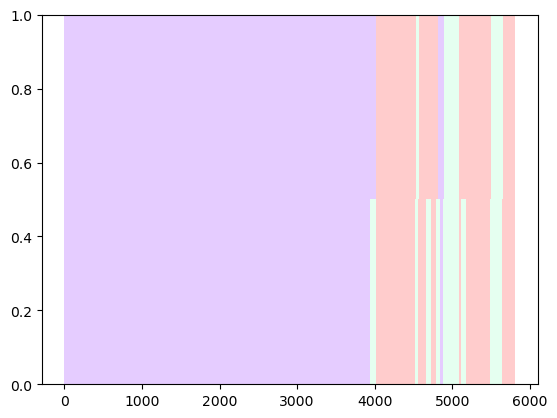

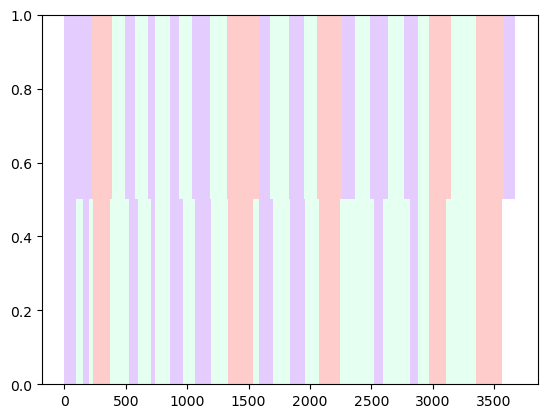

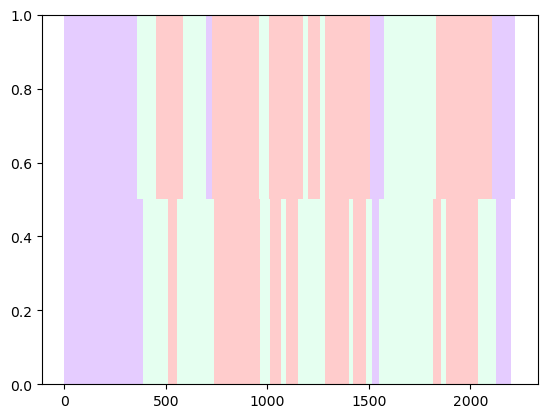

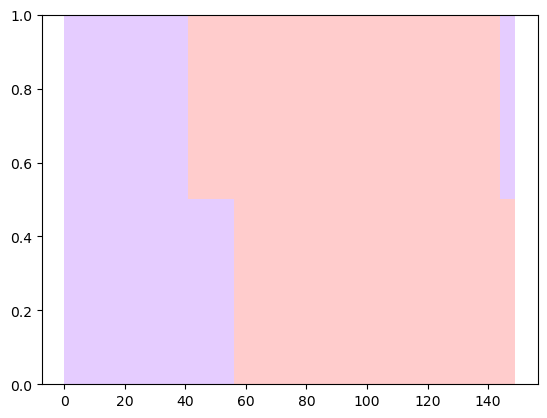

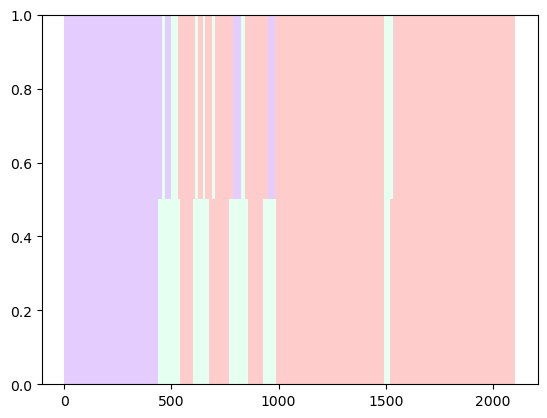

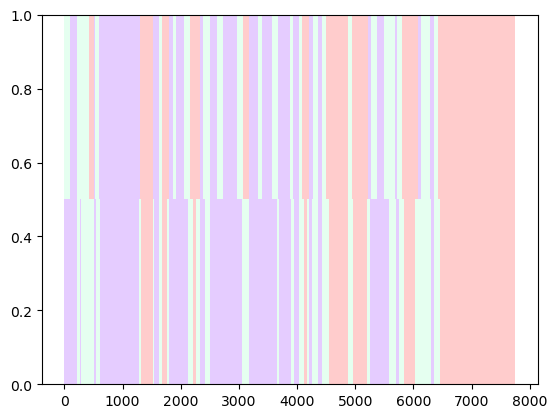

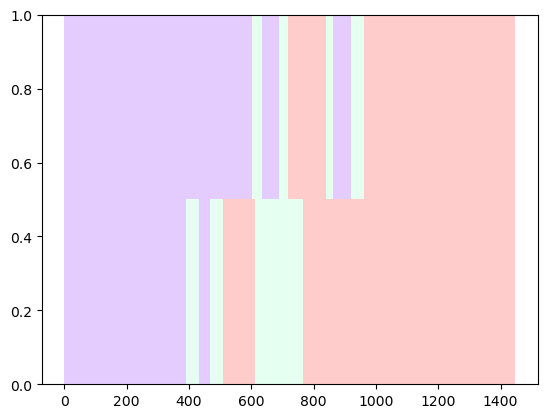

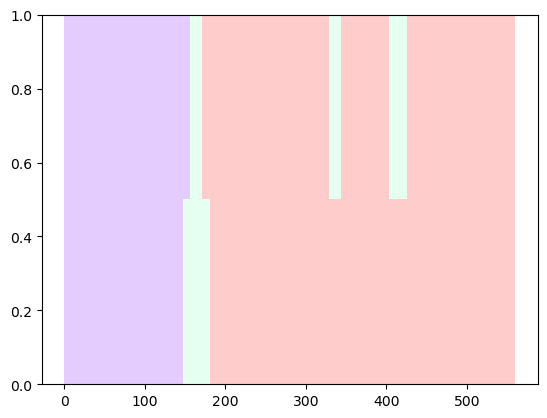

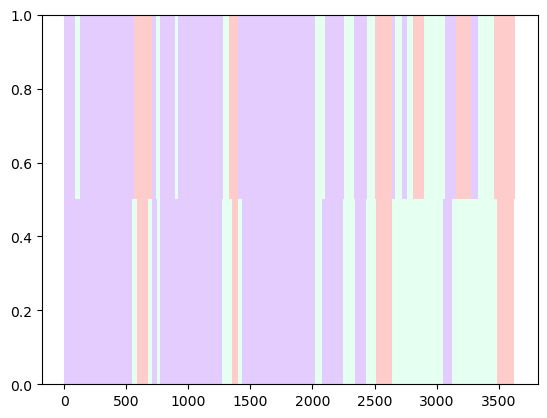

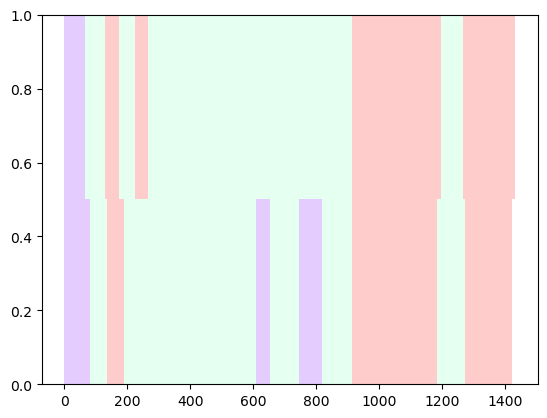

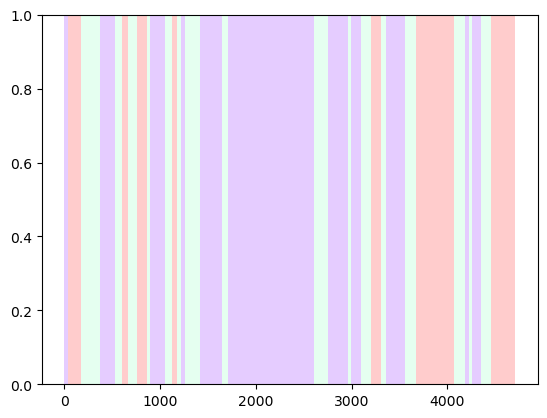

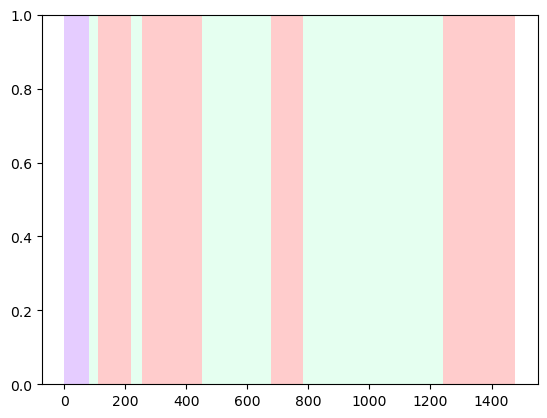

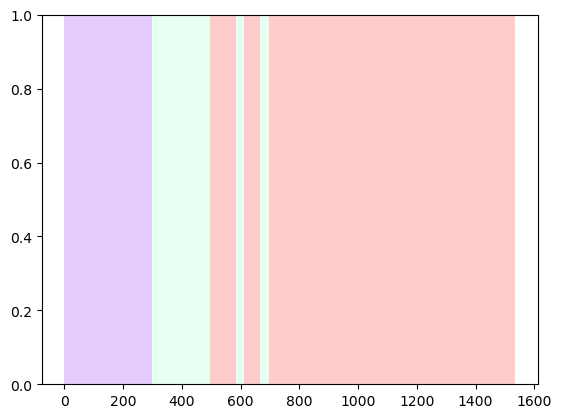

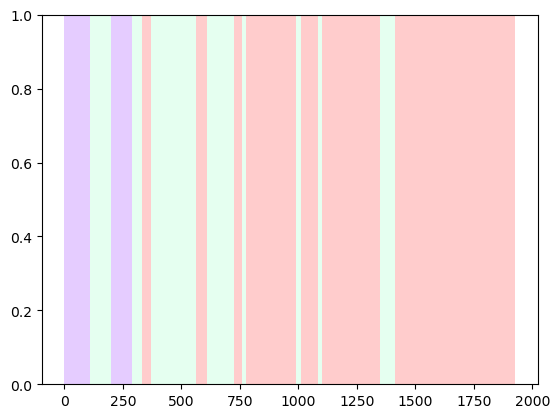

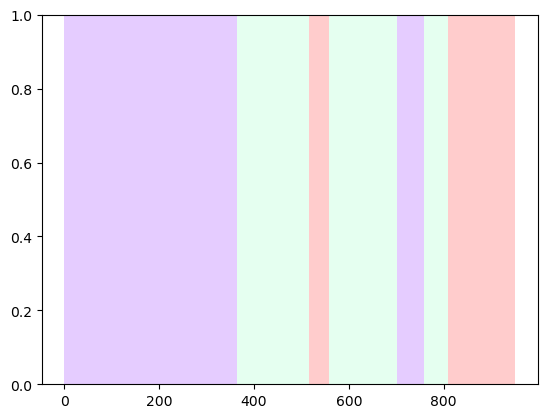

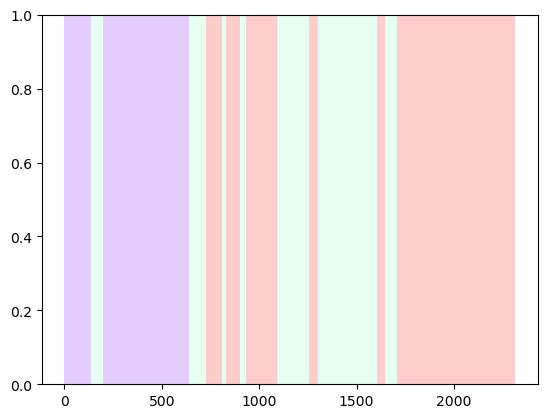

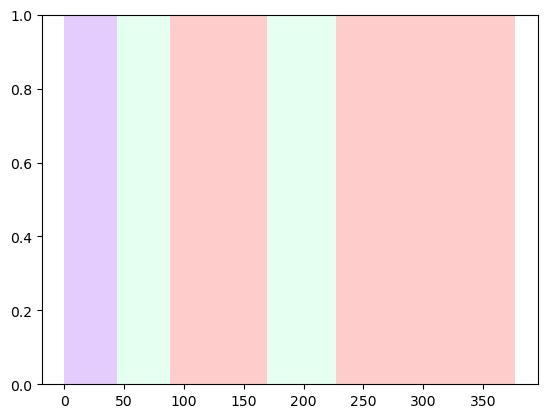

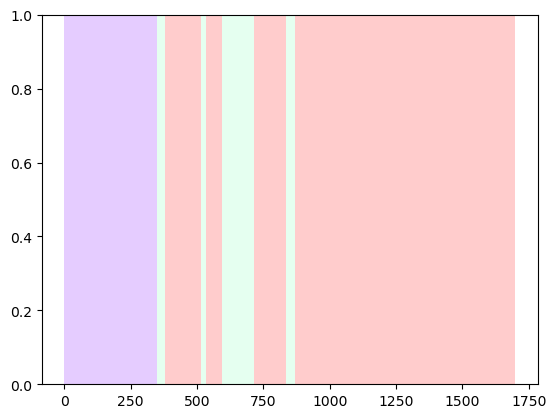

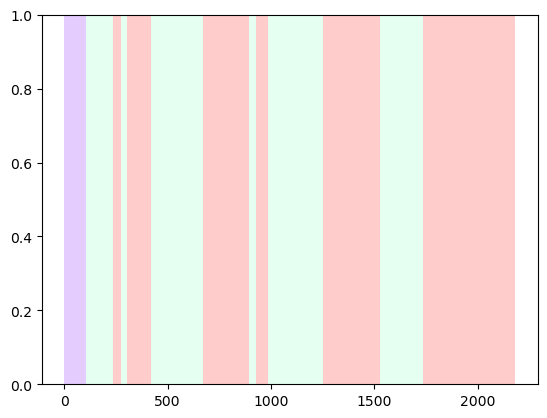

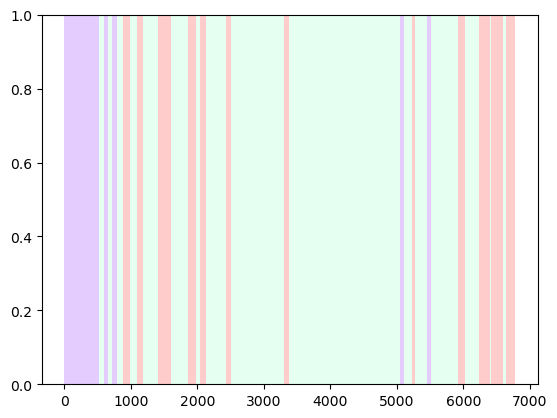

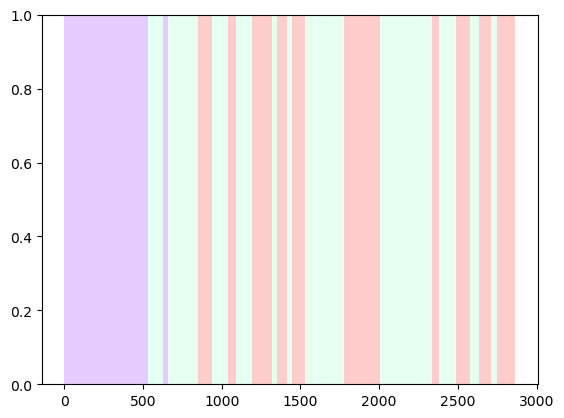

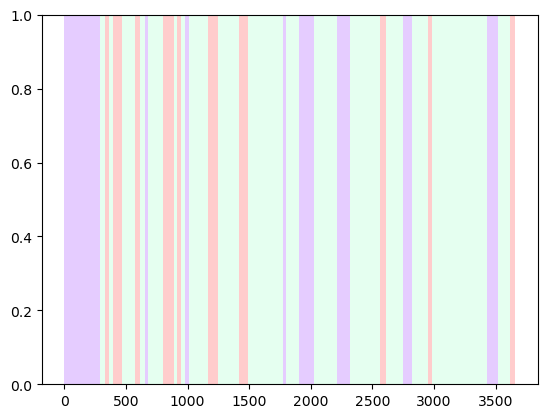

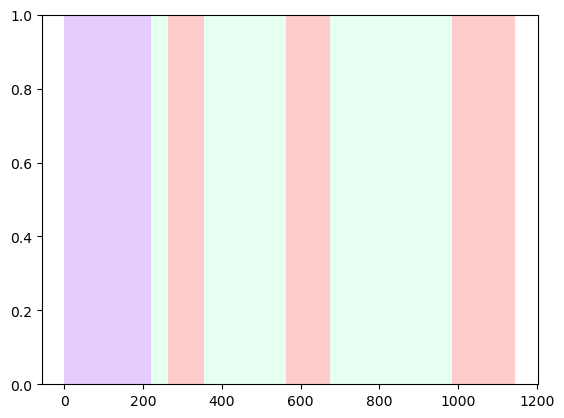

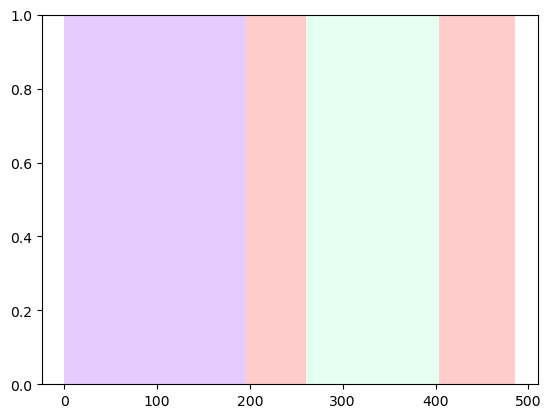

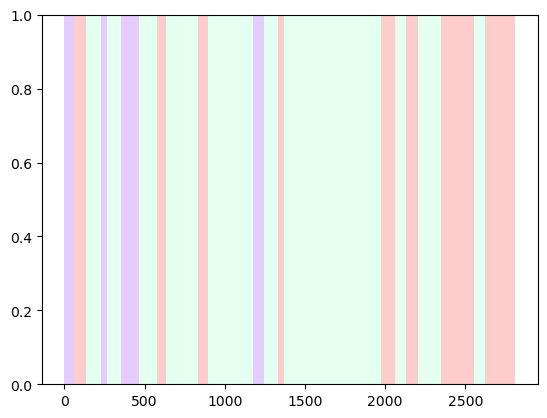

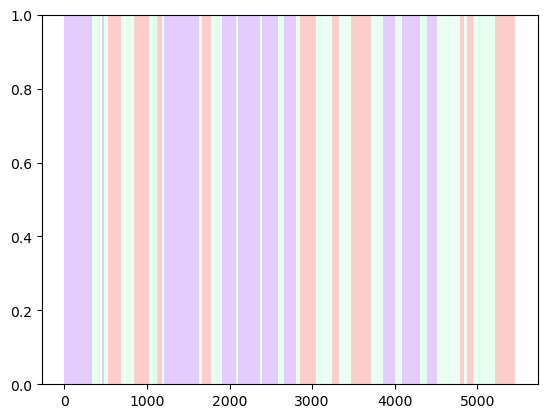

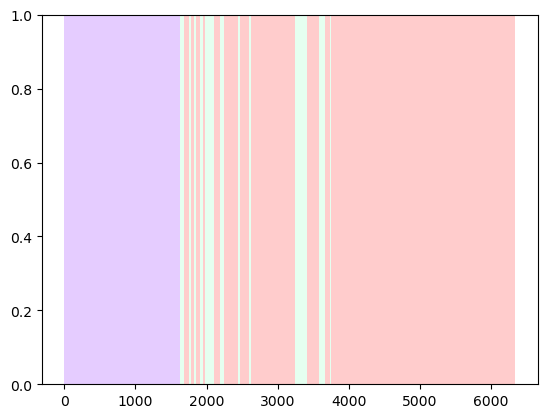

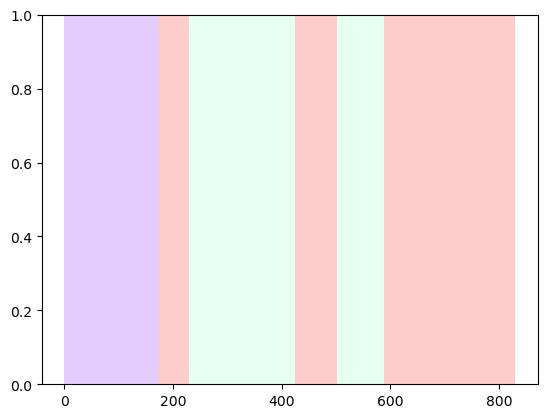

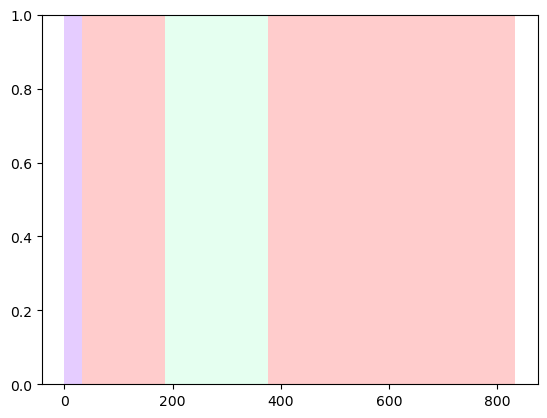

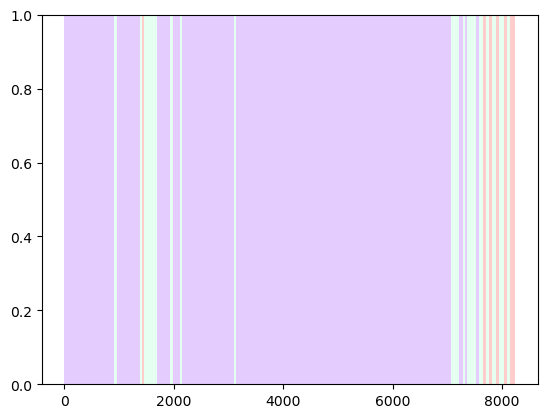

In [47]:

import os
accuracy_list=[]
for j in range(0,len(observations)):
    
    spider_timeidx_hmm = np.array(model_train.predict(observations[j]))

    spider_timeidx_hmm_copy = np.copy(spider_timeidx_hmm)
    nframes = spider_timeidx_hmm_copy.shape[0]

    
    ### REmove very short state
    from itertools import groupby
    count_dups = [sum(1 for _ in group) for _, group in groupby(spider_timeidx_hmm)]
    cumsum= np.cumsum(count_dups)
    
    groups = []
    uniquekeys = []
    for k, g in groupby(spider_timeidx_hmm):
        groups.append(list(g))      # Store group iterator as a list
        uniquekeys.append(k)
    

    
        
    from operator import itemgetter
    indexes = [index for index in range(len(uniquekeys)) if uniquekeys[index] == 0]
     
    #res_list = list(itemgetter(*indexes)(count_dups))
        
    idx = np.where(np.array(uniquekeys)==0)[0]
    
    for i in range(len(idx)):
        if count_dups[idx[i]] < 17:
            if idx[i] > 0 and (idx[i] + 1)>len(count_dups):
                
                if count_dups[idx[i] - 1] - count_dups[idx[i] + 1] > 0:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i] - 1]
                    
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]+1]
                    
            else:
                if idx[i]==0:
                    spider_timeidx_hmm_copy[0:cumsum[(idx[i] + 1)]] = uniquekeys[idx[i] + 1]
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]-1]
                
    idx = np.where(np.array(uniquekeys)==1)[0]
    
    for i in range(len(idx)):
        if count_dups[idx[i]] < 19:
            if idx[i] > 0 and (idx[i] + 1)>len(count_dups):
                
                if count_dups[idx[i] - 1] - count_dups[idx[i] + 1] > 0:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i] - 1]
                    
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]+1]
                    
            else:
                if idx[i]==0:
                    spider_timeidx_hmm_copy[0:cumsum[(idx[i] + 1)]] = uniquekeys[idx[i] + 1]
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]-1]

    idx = np.where(np.array(uniquekeys)==2)[0]
    
    for i in range(len(idx)):
        if count_dups[idx[i]] < 30:
            if idx[i] > 0 and (idx[i] + 1)>len(count_dups):
                
                if count_dups[idx[i] - 1] - count_dups[idx[i] + 1] > 0:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i] - 1]
                    
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]+1]
                    
            else:
                if idx[i]==0:
                    spider_timeidx_hmm_copy[0:cumsum[(idx[i] + 1)]] = uniquekeys[idx[i] + 1]
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]-1]
        
    
    #spider_timeidx_hmm_copy[0:100]=0
    from itertools import groupby
    count_dups = [sum(1 for _ in group) for _, group in groupby(spider_timeidx_hmm_copy)]
    cumsum= np.cumsum(count_dups)
    
    groups = []
    uniquekeys = []
    for k, g in groupby(spider_timeidx_hmm_copy):
        groups.append(list(g))      # Store group iterator as a list
        uniquekeys.append(k)

    count_dups = [sum(1 for _ in group) for _, group in groupby(spider_timeidx_hmm_copy)]
    cumsum= np.cumsum(count_dups)
    if uniquekeys[0]!=0:
        spider_timeidx_hmm_copy[0:count_dups[0]]=0
    from operator import itemgetter
    indexes = [index for index in range(len(uniquekeys)) if uniquekeys[index] == 0]
     
    #res_list = list(itemgetter(*indexes)(count_dups))
        
    idx = np.where(np.array(uniquekeys)==0)[0]
    
    for i in range(len(idx)):
        if count_dups[idx[i]] < 17:
            if idx[i] > 0 and (idx[i] + 1)>len(count_dups):
                
                if count_dups[idx[i] - 1] - count_dups[idx[i] + 1] > 0:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i] - 1]
                    
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]+1]
                    
            else:
                if idx[i]==0:
                    spider_timeidx_hmm_copy[0:cumsum[(idx[i] + 1)]] = uniquekeys[idx[i] + 1]
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]-1]
                
    idx = np.where(np.array(uniquekeys)==1)[0]
    
    for i in range(len(idx)):
        if count_dups[idx[i]] < 19:
            if idx[i] > 0 and (idx[i] + 1)>len(count_dups):
                
                if count_dups[idx[i] - 1] - count_dups[idx[i] + 1] > 0:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i] - 1]
                    
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]+1]
                    
            else:
                if idx[i]==0:
                    spider_timeidx_hmm_copy[0:cumsum[(idx[i] + 1)]] = uniquekeys[idx[i] + 1]
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]-1]

    idx = np.where(np.array(uniquekeys)==2)[0]
    
    for i in range(len(idx)):
        if count_dups[idx[i]] < 30:
            if idx[i] > 0 and (idx[i] + 1)>len(count_dups):
                
                if count_dups[idx[i] - 1] - count_dups[idx[i] + 1] > 0:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i] - 1]
                    
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]+1]
                    
            else:
                if idx[i]==0:
                    spider_timeidx_hmm_copy[0:cumsum[(idx[i] + 1)]] = uniquekeys[idx[i] + 1]
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]-1]
        
    #spider_timeidx_hmm_copy[0:100]=0
    from itertools import groupby
    count_dups = [sum(1 for _ in group) for _, group in groupby(spider_timeidx_hmm_copy)]
    cumsum= np.cumsum(count_dups)
    
    groups = []
    uniquekeys = []
    for k, g in groupby(spider_timeidx_hmm_copy):
        groups.append(list(g))      # Store group iterator as a list
        uniquekeys.append(k)

    count_dups = [sum(1 for _ in group) for _, group in groupby(spider_timeidx_hmm_copy)]
    cumsum= np.cumsum(count_dups)
    if uniquekeys[0]!=0:
        spider_timeidx_hmm_copy[0:count_dups[0]]=0

    #spider_timeidx_hmm_copy[0:100]=0
    from itertools import groupby
    count_dups = [sum(1 for _ in group) for _, group in groupby(spider_timeidx_hmm_copy)]
    cumsum= np.cumsum(count_dups)
    
    groups = []
    uniquekeys = []
    for k, g in groupby(spider_timeidx_hmm_copy):
        groups.append(list(g))      # Store group iterator as a list
        uniquekeys.append(k)

    count_dups = [sum(1 for _ in group) for _, group in groupby(spider_timeidx_hmm_copy)]
    cumsum= np.cumsum(count_dups)
    if uniquekeys[0]!=0:
        spider_timeidx_hmm_copy[0:count_dups[0]]=0
    from operator import itemgetter
    indexes = [index for index in range(len(uniquekeys)) if uniquekeys[index] == 0]
     
    #res_list = list(itemgetter(*indexes)(count_dups))
        
    idx = np.where(np.array(uniquekeys)==0)[0]
    
    for i in range(len(idx)):
        if count_dups[idx[i]] < 17:
            if idx[i] > 0 and (idx[i] + 1)>len(count_dups):
                
                if count_dups[idx[i] - 1] - count_dups[idx[i] + 1] > 0:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i] - 1]
                    
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]+1]
                    
            else:
                if idx[i]==0:
                    spider_timeidx_hmm_copy[0:cumsum[(idx[i] + 1)]] = uniquekeys[idx[i] + 1]
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]-1]
                
    idx = np.where(np.array(uniquekeys)==1)[0]
    
    for i in range(len(idx)):
        if count_dups[idx[i]] < 19:
            if idx[i] > 0 and (idx[i] + 1)>len(count_dups):
                
                if count_dups[idx[i] - 1] - count_dups[idx[i] + 1] > 0:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i] - 1]
                    
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]+1]
                    
            else:
                if idx[i]==0:
                    spider_timeidx_hmm_copy[0:cumsum[(idx[i] + 1)]] = uniquekeys[idx[i] + 1]
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]-1]

    idx = np.where(np.array(uniquekeys)==2)[0]
    
    for i in range(len(idx)):
        if count_dups[idx[i]] < 30:
            if idx[i] > 0 and (idx[i] + 1)>len(count_dups):
                
                if count_dups[idx[i] - 1] - count_dups[idx[i] + 1] > 0:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i] - 1]
                    
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]+1]
                    
            else:
                if idx[i]==0:
                    spider_timeidx_hmm_copy[0:cumsum[(idx[i] + 1)]] = uniquekeys[idx[i] + 1]
                else:
                    spider_timeidx_hmm_copy[cumsum[(idx[i] - 1)]:cumsum[idx[i]]] = uniquekeys[idx[i]-1]
        
    #spider_timeidx_hmm_copy[0:100]=0
    from itertools import groupby
    count_dups = [sum(1 for _ in group) for _, group in groupby(spider_timeidx_hmm_copy)]
    cumsum= np.cumsum(count_dups)
    
    groups = []
    uniquekeys = []
    for k, g in groupby(spider_timeidx_hmm_copy):
        groups.append(list(g))      # Store group iterator as a list
        uniquekeys.append(k)

    count_dups = [sum(1 for _ in group) for _, group in groupby(spider_timeidx_hmm_copy)]
    cumsum= np.cumsum(count_dups)
    if uniquekeys[0]!=0:
        spider_timeidx_hmm_copy[0:count_dups[0]]=0


    beh_label= filenames[j].replace('_croprotaligned01234_nonormalized_wavelet.npz', '_croprotaligned01234_manual_labels.npy')
    if j>9:
        np.save('C:/Users/Gordus_Lab/Desktop/temp2/'+filenames[j].split('/cut_wavelet\\')[1].replace('.npz', '_hmm_umap_filtered_predictedlabels.npy'), spider_timeidx_hmm_copy)
        spider_timeidx_hmm_copy[-1]=1
        df = spider_timeidx_hmm_copy
        plot_idx = np.arange(0,len(spider_timeidx_hmm_copy))
        
        fig = plt.figure()
        ax2=plt.subplot()
        plot_state_predict_as_color(x_data=plot_idx, state_data_predict= df, newcolors=newcolors, axis=ax2)
        #plt.savefig(filenames[j].replace('.npz', '_hmm_umap_filtered_manualpredictedlabels.png'))

        plt.savefig('C:/Users/Gordus_Lab/Desktop/temp2/'+filenames[j].split('/cut_wavelet\\')[1].replace('.npz', '_hmm_umap_filtered_predictedlabels.png'))
    
    else:
        
        
        labeled_beh_copy = np.load(beh_label)
        # except:
        #     labeled_beh_copy = np.load('C:/Users/Gordus_Lab/Desktop/temp/' + filenames[j].split('/wavelet\\')[1].split('01234')[
        #         0] + '01234_nonormalized_wavelet_hmm_umap_filtered_predictedlabels.npy')
        np.save('C:/Users/Gordus_Lab/Desktop/temp2/'+filenames[j].split('/wavelet\\')[1].replace('.npz', '_hmm_umap_filtered_predictedlabels.npy'), spider_timeidx_hmm_copy)
        labeled_beh_copy=labeled_beh_copy[0:len(spider_timeidx_hmm_copy)]
        labeled_beh_copy[-1]=1
        spider_timeidx_hmm_copy[-1]=1
    
        df = spider_timeidx_hmm_copy
        plot_idx = np.arange(0,len(spider_timeidx_hmm_copy))
        df2 = np.array(labeled_beh_copy).astype(int)
        fig = plt.figure()
        ax2=plt.subplot()
        plot_state_as_color(x_data=plot_idx, state_data=df2, state_data_predict = df, newcolors=newcolors, axis=ax2)
        #plt.savefig(filenames[j].replace('.npz', '_hmm_umap_filtered_manualpredictedlabels.png'))

        plt.savefig('C:/Users/Gordus_Lab/Desktop/temp2/'+filenames[j].split('/wavelet\\')[1].replace('.npz', '_hmm_umap_filtered_predictedlabels.png'))
    
        spider_timeidx_hmm_copy = spider_timeidx_hmm_copy[0:len(labeled_beh_copy)]
        accuracy = sum((spider_timeidx_hmm_copy==np.array(labeled_beh_copy).astype(int)).astype(int))/len(labeled_beh_copy)
        print(accuracy)
        accuracy_list.append(accuracy)

    
    #os.mkdir(pathset)
print(np.mean(accuracy_list))
    



In [51]:
# Save to file

model_path = "hmm_30prey_model.json"
# Save model to JSON
model_json = model_train.to_json()

# Optionally, write to a file
with open(model_path, "w") as f:
    f.write(model_json)

In [52]:
with open(model_path, "r") as f:
    model_json = f.read()

# Load the model from JSON
loaded_model = HiddenMarkovModel.from_json(model_json)

# Use the loaded model
t = loaded_model.dense_transition_matrix()
print(f"Transition matrix: {t}")

Transition matrix: [[9.96080247e-01 3.88474921e-03 3.50042677e-05 0.00000000e+00
  0.00000000e+00]
 [3.17795886e-03 9.89668323e-01 7.15371837e-03 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 7.08602758e-03 9.92913972e-01 0.00000000e+00
  0.00000000e+00]
 [5.33754137e-01 2.67563100e-01 1.98682763e-01 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]]
